<a href="https://colab.research.google.com/github/quangdu66/Learning/blob/main/Treasury_Bond_Seasonality_Effects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Treasury Bond Seasonality Effects

A quick analysis on turn of the month effects in treasury bond ETFs.

In [ ]:
install.packages("quantmod")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’




In [ ]:
library(quantmod)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [ ]:
# install packages if not already installed
if (!require(tidyverse)) {
  install.packages("tidyverse")
  library(dplyr)
}

if (!require(quantmod)) {
  install.packages("quantmod")
  library(quantmod)
}

options(repr.plot.width = 14, repr.plot.height=7)
theme_update(text = element_text(size = 20))

# function to get adjusted OHLC prices for a given symbol in a data frame using dplyr
get_ohlc <- function(symbol, start_date, end_date) {
  data <- getSymbols(symbol, src = "yahoo", from = start_date, to = end_date, auto.assign = FALSE)
  data_df <- data.frame(date = index(data), coredata(data))
  colnames(data_df) <- tolower(sub(paste0(symbol, "\\."), "", colnames(data_df)))
  data_df <- rename(data_df, "adj_close" = adjusted)

  return(data_df)
}

In [ ]:
tlt <- get_ohlc(symbol = 'TLT', start_date = '1990-01-01', end_date = Sys.Date())

In [ ]:
head(tlt)

,date,open,high,low,close,volume,adj_close
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2002-07-30,81.75,81.90,81.52,81.52,6100,38.69170
2,2002-07-31,81.95,82.80,81.90,82.53,29400,39.17105
3,2002-08-01,82.54,83.02,82.54,83.00,25000,39.39409
4,2002-08-02,83.16,84.10,82.88,83.85,52800,39.79753
5,2002-08-05,84.04,84.44,83.85,84.22,61100,39.97319
6,2002-08-06,83.87,83.90,83.22,83.50,64900,39.63143


In [ ]:
tail(tlt)

,date,open,high,low,close,volume,adj_close
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5594,2024-10-17,94.29,94.44,93.67,93.80,43427200,93.80
5595,2024-10-18,94.05,94.28,93.86,93.87,25258600,93.87
5596,2024-10-21,93.02,93.09,92.23,92.23,49504700,92.23
5597,2024-10-22,92.65,92.76,92.09,92.32,32096900,92.32
5598,2024-10-23,91.84,92.37,91.66,92.07,33354200,92.07
5599,2024-10-24,92.23,93.00,91.96,92.66,32498100,92.66


In [ ]:
tlt %>%
  summarize(
    record_count = n(),
    start_date = min(date),
    end_date = max(date)
  )

record_count,start_date,end_date
<int>,<date>,<date>
5599,2002-07-30,2024-10-24


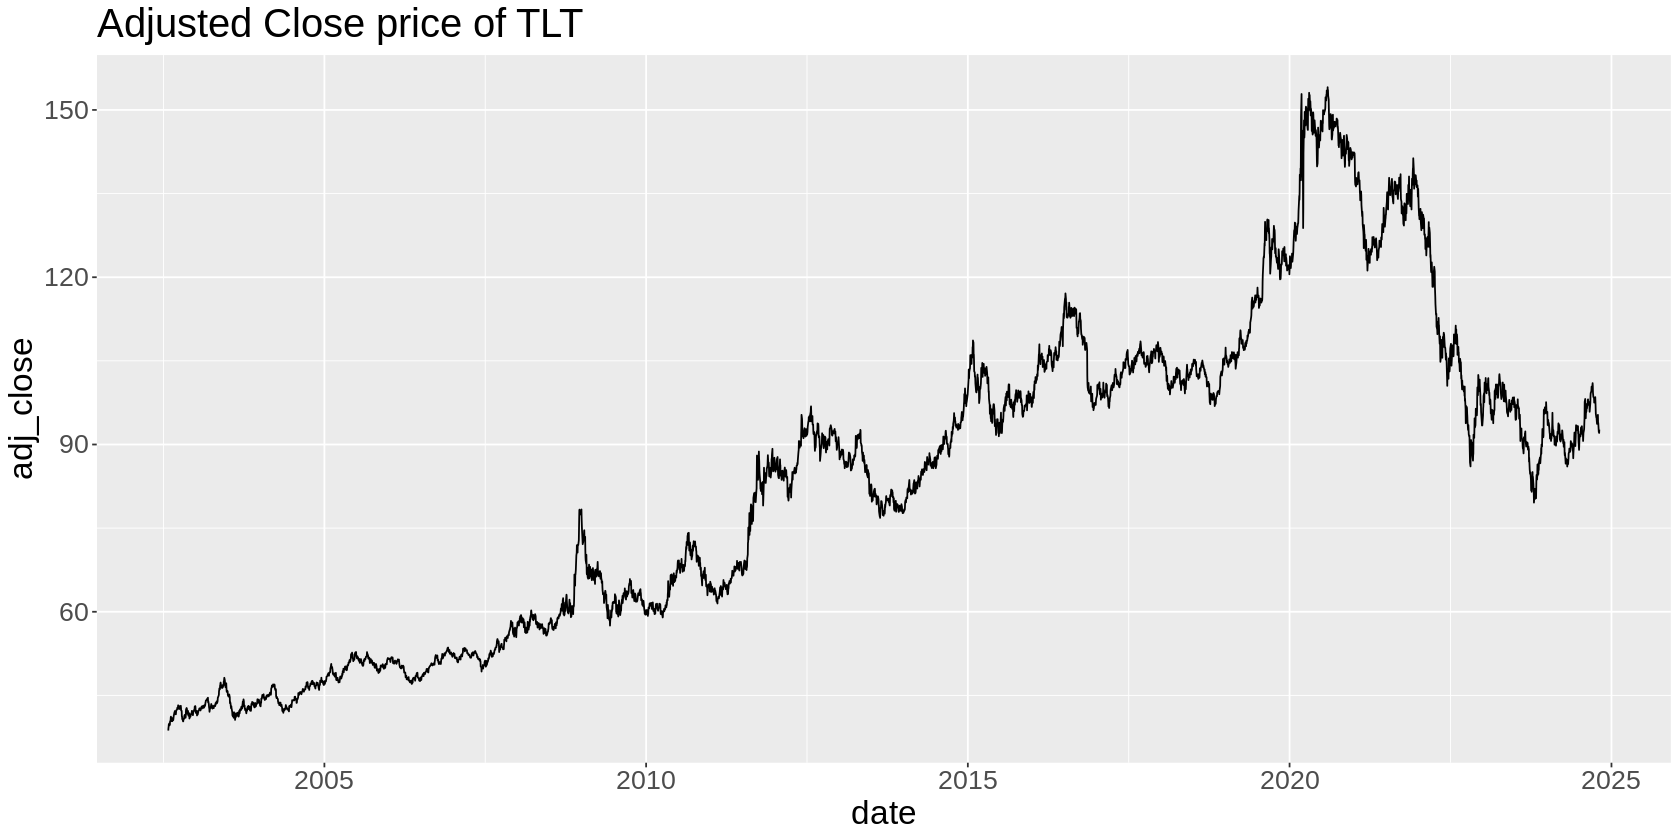

In [ ]:
library(ggplot2)
tlt %>%
  ggplot(aes(x=date, y=adj_close)) +
    geom_line() +
    ggtitle('Adjusted Close price of TLT')

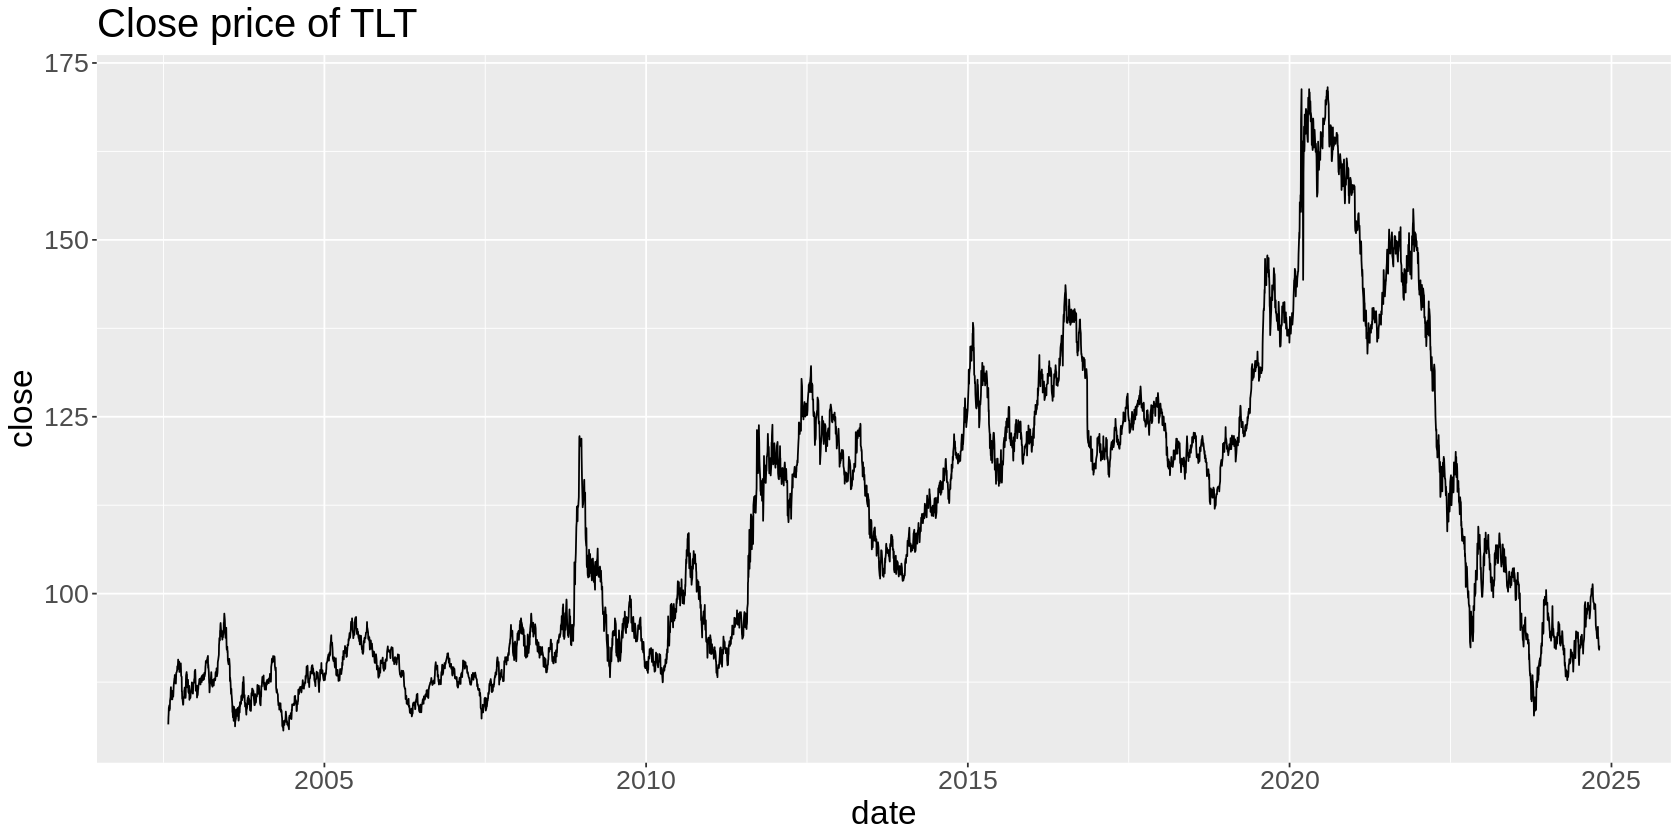

In [ ]:
tlt %>%
  ggplot(aes(x=date, y=close)) +
    geom_line() +
    ggtitle('Close price of TLT')

In [ ]:
tlt %>%
  group_by(date) %>%
  summarize(count = n()) %>%
  filter(count != 1)

date,count
<date>,<int>


# Calculate daily log returns

In [ ]:
tlt %>% head()

,date,open,high,low,close,volume,adj_close
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2002-07-30,81.75,81.90,81.52,81.52,6100,38.69170
2,2002-07-31,81.95,82.80,81.90,82.53,29400,39.17105
3,2002-08-01,82.54,83.02,82.54,83.00,25000,39.39409
4,2002-08-02,83.16,84.10,82.88,83.85,52800,39.79753
5,2002-08-05,84.04,84.44,83.85,84.22,61100,39.97319
6,2002-08-06,83.87,83.90,83.22,83.50,64900,39.63143


In [ ]:
returns <- tlt %>%
  arrange(date) %>%
  mutate(logreturns = log(adj_close / lag(adj_close)))

returns %>% head()

,date,open,high,low,close,volume,adj_close,logreturns
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2002-07-30,81.75,81.90,81.52,81.52,6100,38.69170,NA
2,2002-07-31,81.95,82.80,81.90,82.53,29400,39.17105,0.012312971
3,2002-08-01,82.54,83.02,82.54,83.00,25000,39.39409,0.005677696
4,2002-08-02,83.16,84.10,82.88,83.85,52800,39.79753,0.010189201
5,2002-08-05,84.04,84.44,83.85,84.22,61100,39.97319,0.004404013
6,2002-08-06,83.87,83.90,83.22,83.50,64900,39.63143,-0.008586457


Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”


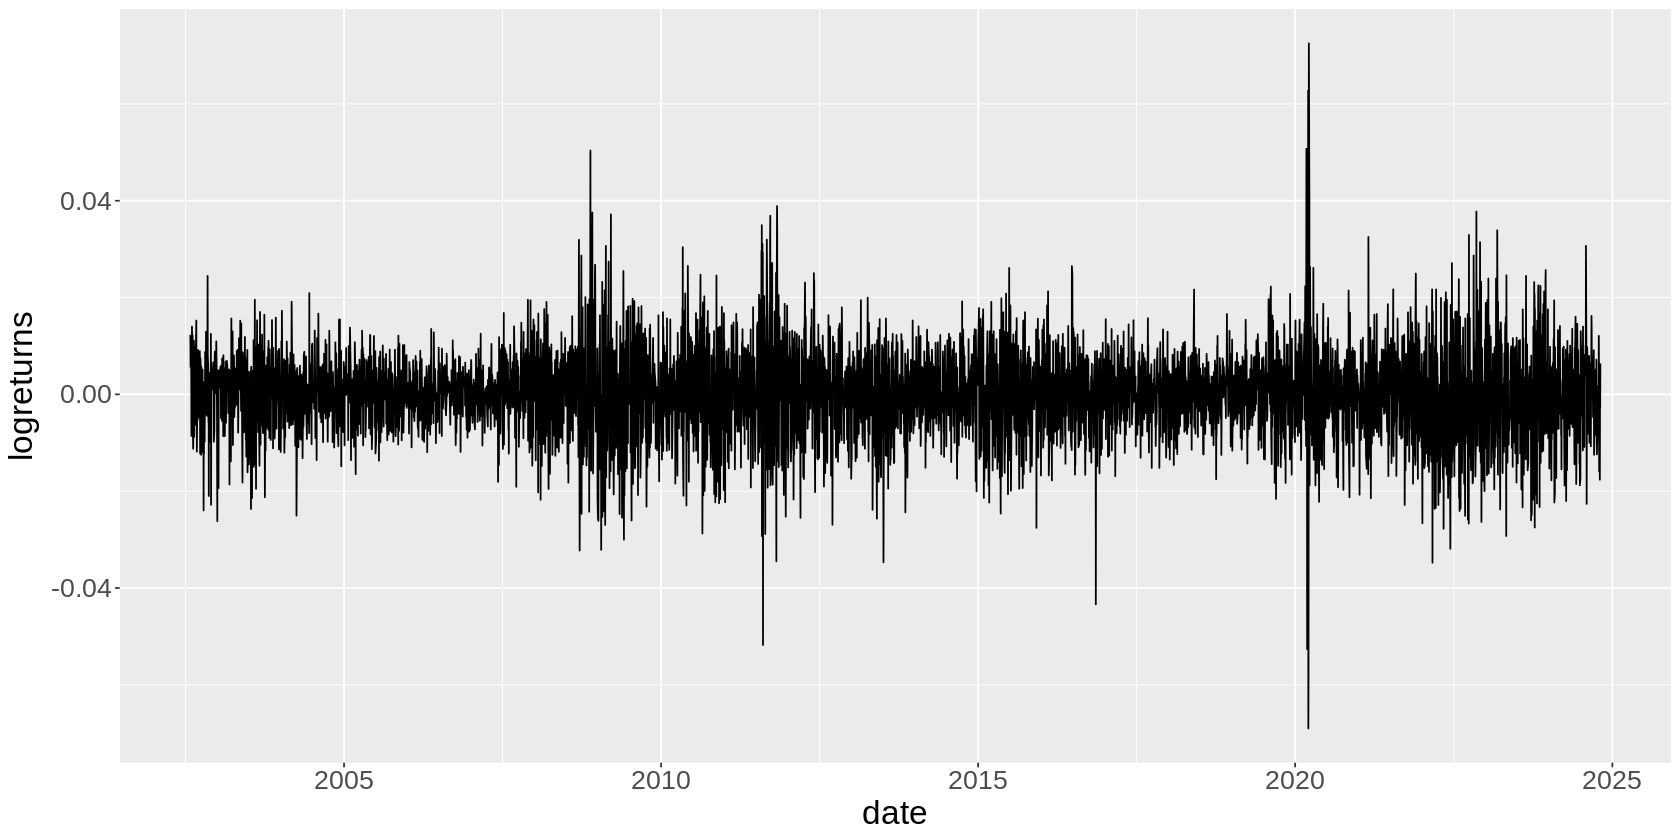

In [ ]:
returns %>%
  ggplot(aes(x=date, y=logreturns)) + geom_line()

Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_bin()`).”


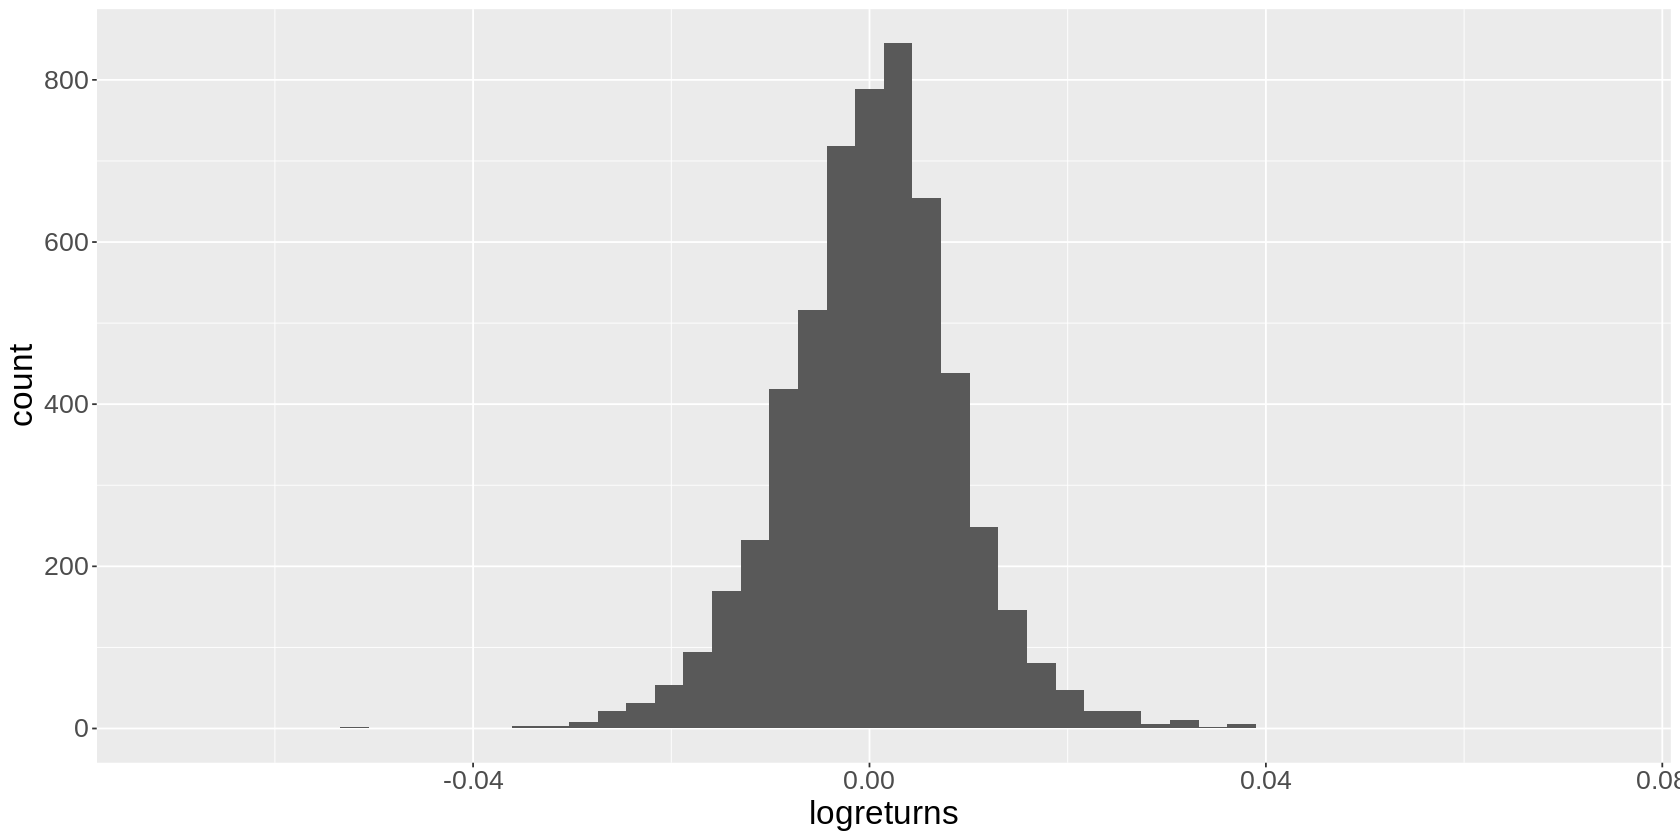

In [ ]:
returns %>%
  ggplot(aes(x=logreturns)) + geom_histogram(bins=50)

In [ ]:
returns <- returns %>%
  mutate(dom = lubridate::day(date))

returns %>% head()

,date,open,high,low,close,volume,adj_close,logreturns,dom
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2002-07-30,81.75,81.90,81.52,81.52,6100,38.69170,NA,30
2,2002-07-31,81.95,82.80,81.90,82.53,29400,39.17105,0.012312971,31
3,2002-08-01,82.54,83.02,82.54,83.00,25000,39.39409,0.005677696,1
4,2002-08-02,83.16,84.10,82.88,83.85,52800,39.79753,0.010189201,2
5,2002-08-05,84.04,84.44,83.85,84.22,61100,39.97319,0.004404013,5
6,2002-08-06,83.87,83.90,83.22,83.50,64900,39.63143,-0.008586457,6


# Group by day of the month and calculate mean returns

we want to transform our data into 31 calendar day observations

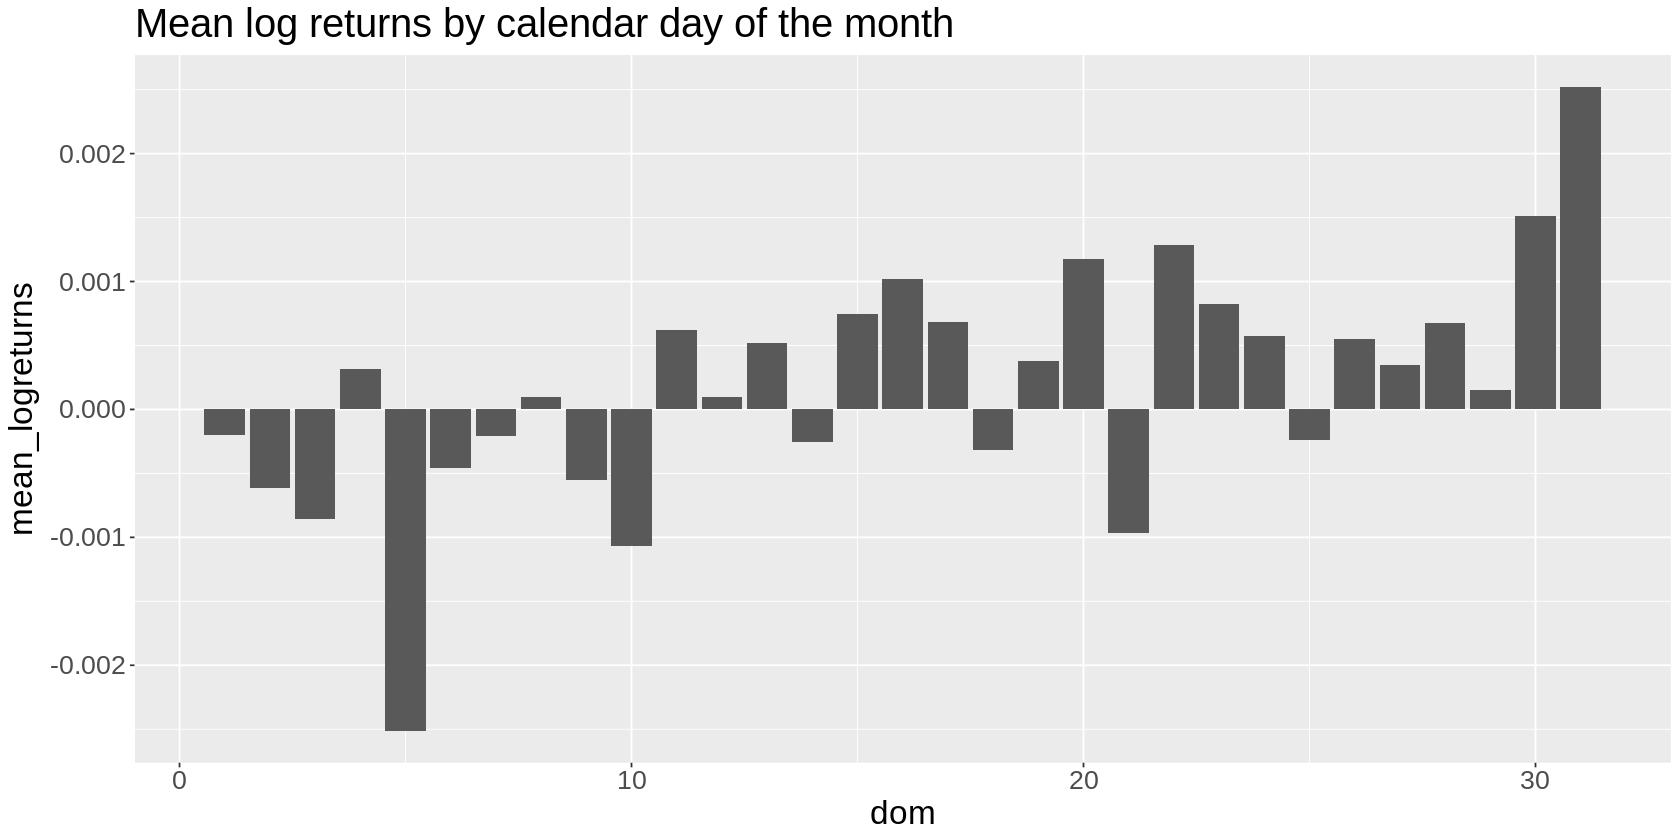

In [ ]:
returns %>%
  na.omit() %>%
  group_by(dom) %>%
  summarize(mean_logreturns = mean(logreturns)) %>%
  ggplot(aes(x=dom, y=mean_logreturns)) +
    geom_bar(stat='identity') +
    ggtitle('Mean log returns by calendar day of the month')

Does trading day of the month looks markedly different?

In [ ]:
returns %>% head()

,date,open,high,low,close,volume,adj_close,logreturns,dom
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2002-07-30,81.75,81.90,81.52,81.52,6100,38.69170,NA,30
2,2002-07-31,81.95,82.80,81.90,82.53,29400,39.17105,0.012312971,31
3,2002-08-01,82.54,83.02,82.54,83.00,25000,39.39409,0.005677696,1
4,2002-08-02,83.16,84.10,82.88,83.85,52800,39.79753,0.010189201,2
5,2002-08-05,84.04,84.44,83.85,84.22,61100,39.97319,0.004404013,5
6,2002-08-06,83.87,83.90,83.22,83.50,64900,39.63143,-0.008586457,6


In [ ]:
returns <- returns %>%
 mutate(som = lubridate::floor_date(date, 'month')) %>%
 group_by(som) %>%
 arrange(date) %>%
 mutate(tdom = row_number())

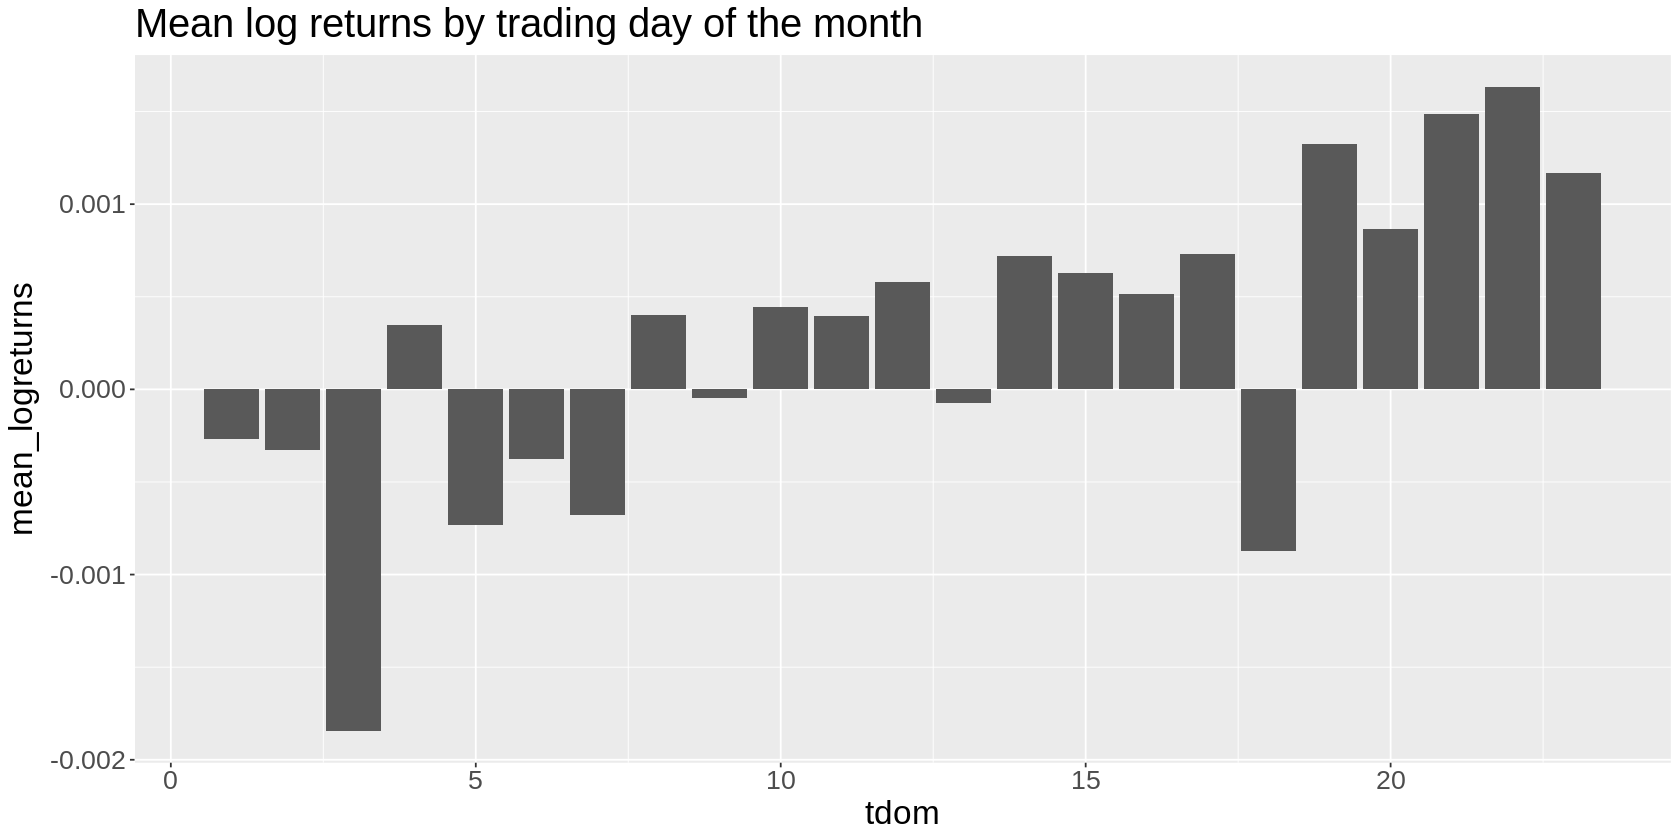

In [ ]:
returns %>%
  na.omit() %>%
  group_by(tdom) %>%
  summarize(mean_logreturns = mean(logreturns)) %>%
  ggplot(aes(x=tdom, y=mean_logreturns)) +
    geom_bar(stat='identity') +
    ggtitle('Mean log returns by trading day of the month')

# How stable is this effect over time?

`summarise()` has grouped output by 'dom'. You can override using the `.groups`
argument.


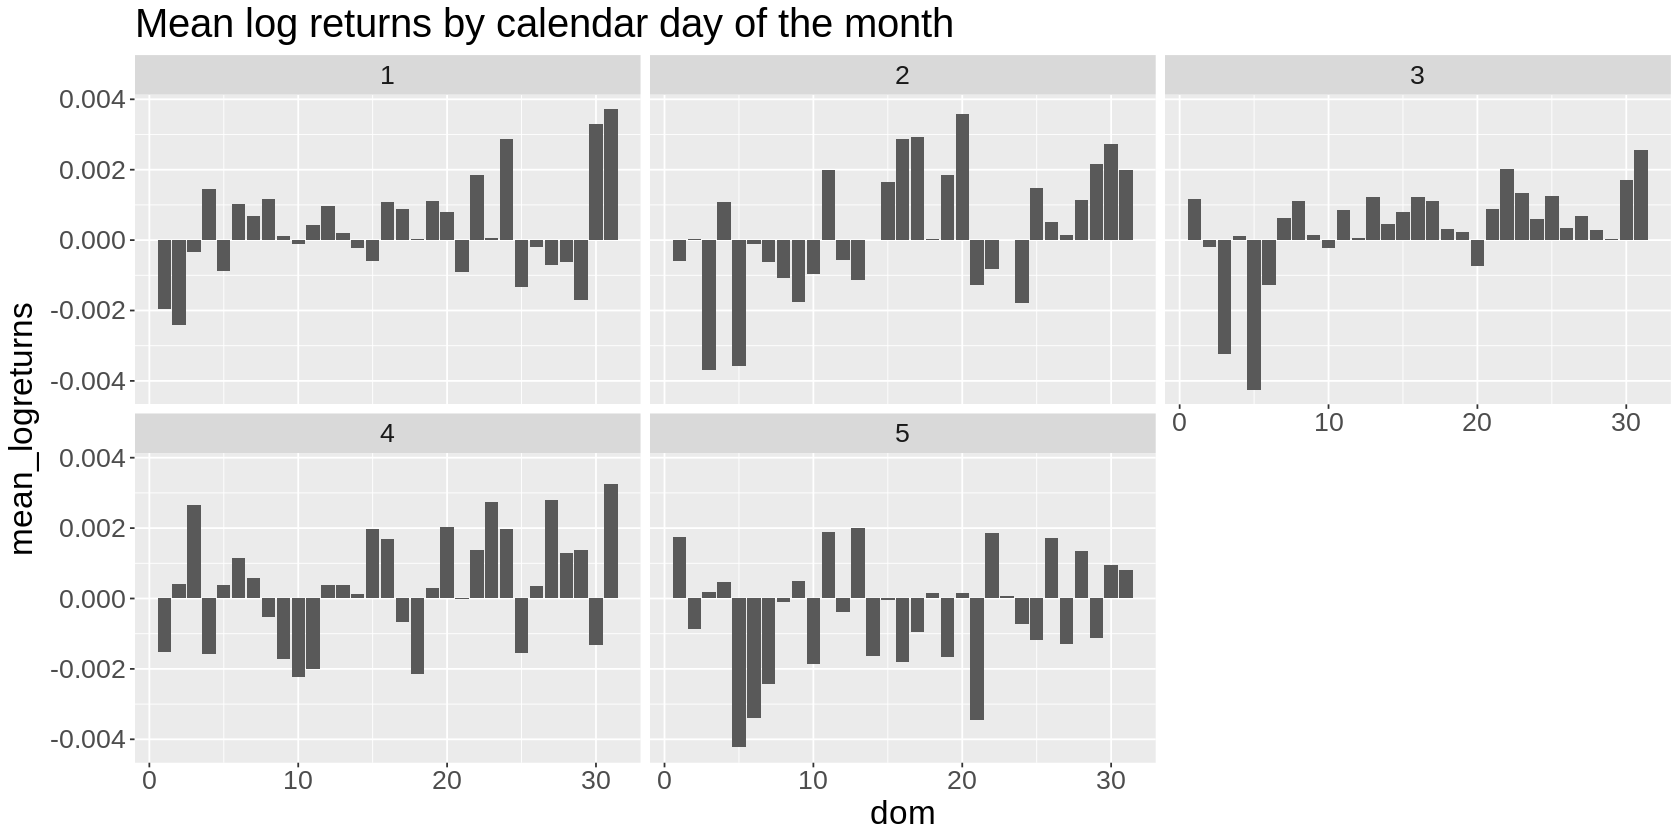

In [ ]:
returns %>%
  ungroup() %>%
  mutate(date_bucket = ntile(date, 5)) %>%
  na.omit() %>%
  group_by(dom, date_bucket) %>%
  summarize(mean_logreturns = mean(logreturns)) %>%
  ggplot(aes(x=dom, y=mean_logreturns)) +
    geom_bar(stat='identity') +
    ggtitle('Mean log returns by calendar day of the month') +
    facet_wrap(~date_bucket)

`summarise()` has grouped output by 'tdom'. You can override using the
`.groups` argument.


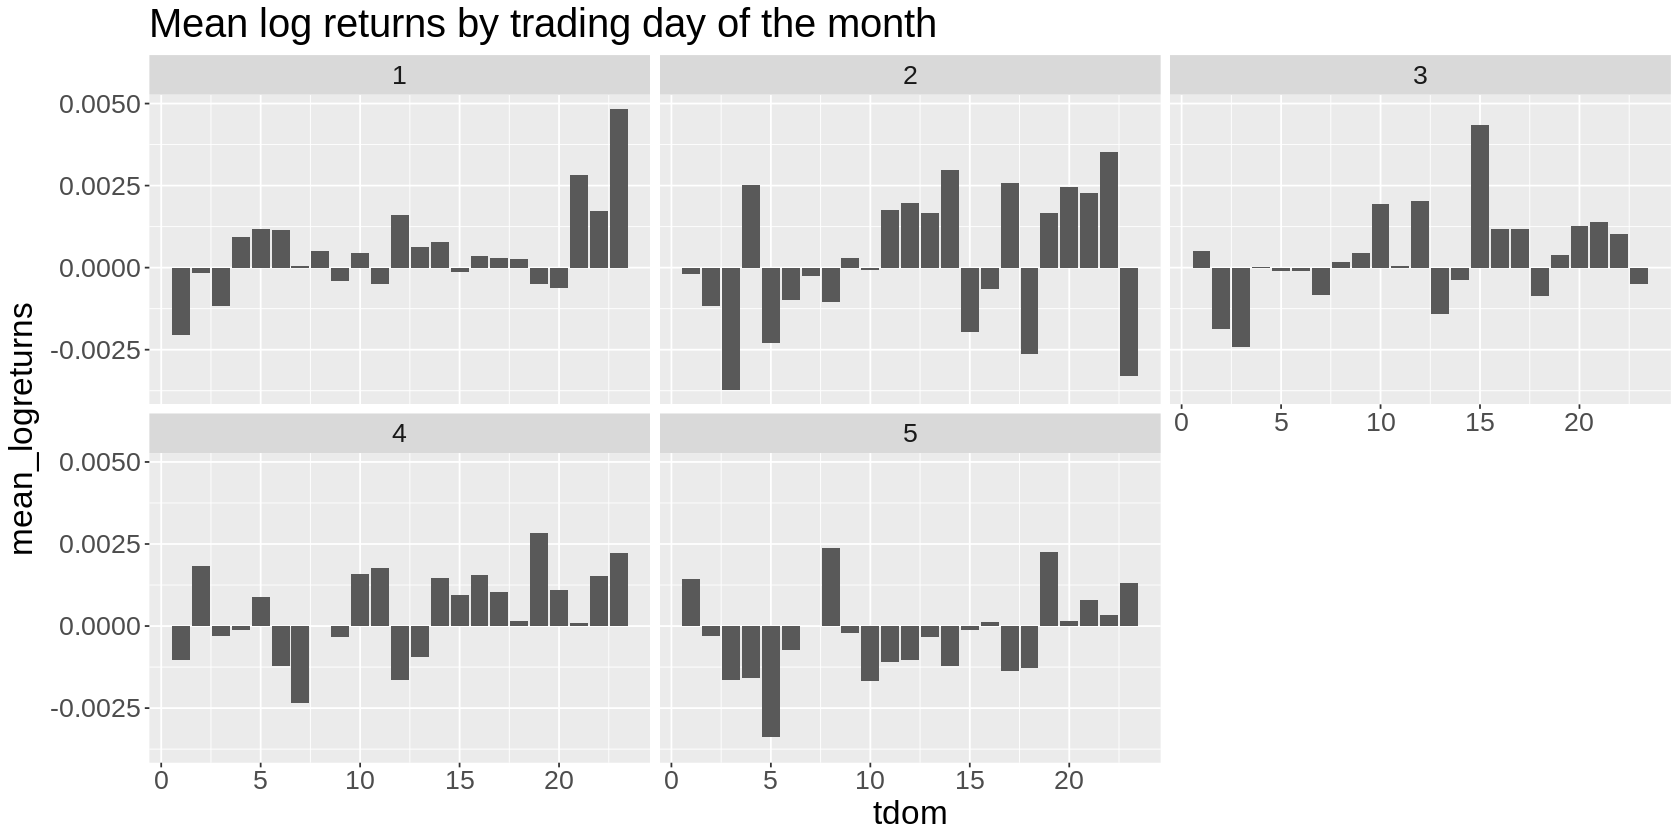

In [ ]:
returns %>%
  ungroup() %>%
  mutate(date_bucket = ntile(date, 5)) %>%
  na.omit() %>%
  group_by(tdom, date_bucket) %>%
  summarize(mean_logreturns = mean(logreturns)) %>%
  ggplot(aes(x=tdom, y=mean_logreturns)) +
    geom_bar(stat='identity') +
    ggtitle('Mean log returns by trading day of the month') +
    facet_wrap(~date_bucket)

Look it by year to get a sense of how noisy the effect is.

`summarise()` has grouped output by 'tdom'. You can override using the
`.groups` argument.


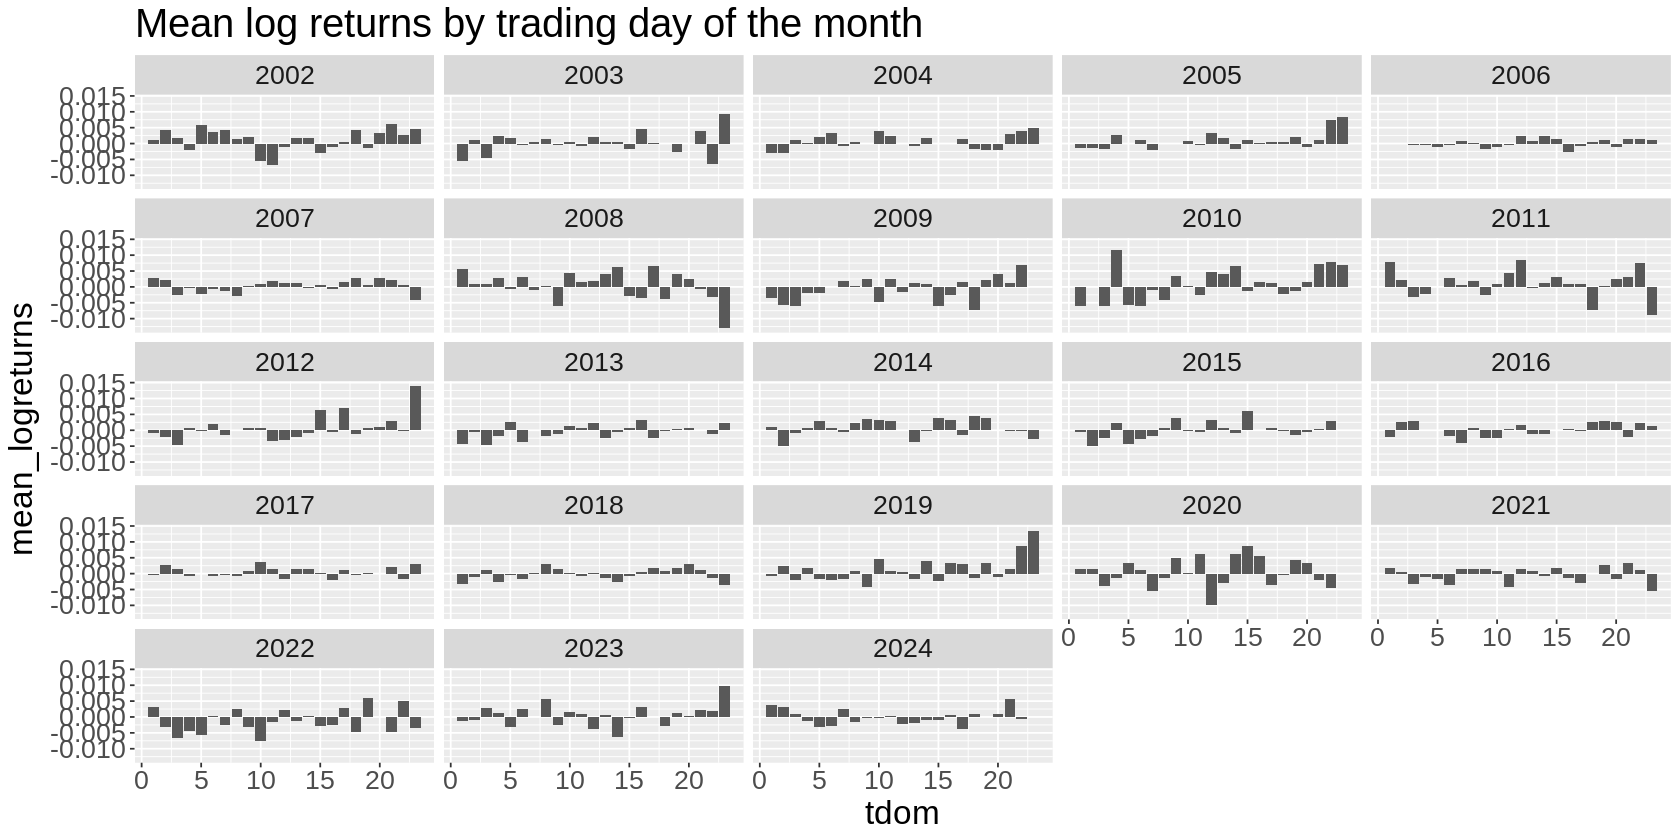

In [ ]:
returns %>%
  ungroup() %>%
  mutate(year = lubridate::year(date)) %>%
  na.omit() %>%
  group_by(tdom, year) %>%
  summarize(mean_logreturns = mean(logreturns)) %>%
  ggplot(aes(x=tdom, y=mean_logreturns)) +
    geom_bar(stat='identity') +
    ggtitle('Mean log returns by trading day of the month') +
    facet_wrap(~year)

Another way to look at the stability of an effect is to create a metric we can plot as a function of timee.

In this case make a monthly metric, which is TLT returns in last 5 days of month minus TLT returns in first 5 days.

First, plot cumulative returns each month (which will look like a backtest equity curve)

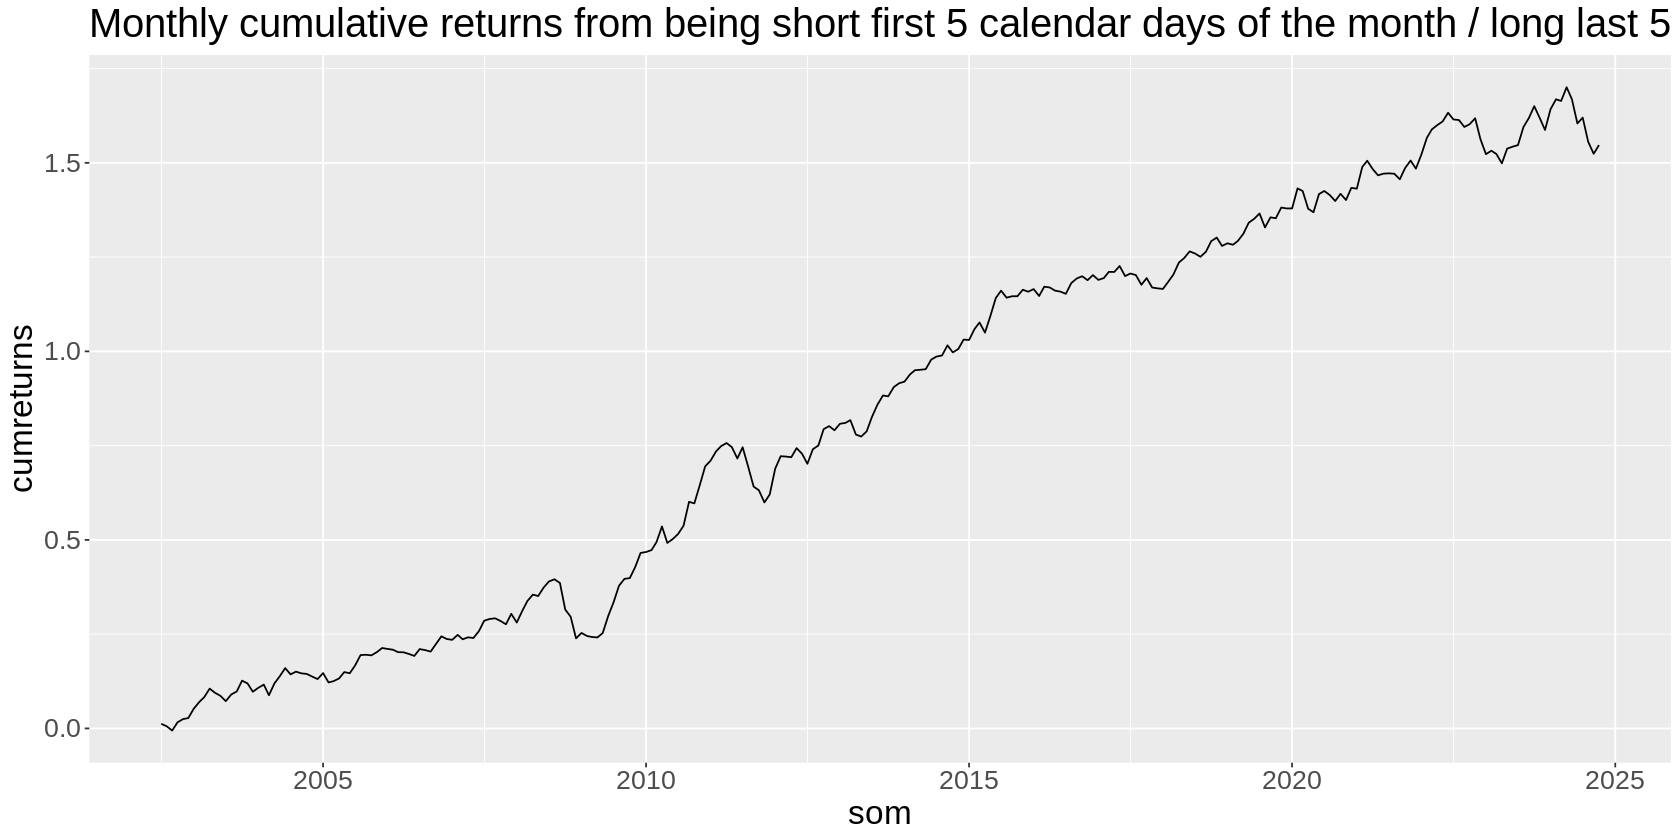

In [ ]:
returns %>%
  na.omit()  %>%
  ungroup() %>%
  mutate(metric_return = case_when(dom <= 5 ~ -1, dom >= 31-5 ~ 1, TRUE ~ 0) * logreturns) %>%
  group_by(som) %>%
  summarize(metric_return = sum(metric_return)) %>%
  arrange(som) %>%
  mutate(cumreturns = cumsum(metric_return)) %>%
  ggplot(aes(x=som, y=cumreturns)) +
    geom_line() +
    ggtitle('Monthly cumulative returns from being short first 5 calendar days of the month / long last 5 calendar days of the month')

Now just plot monthly returns as a bar chart.

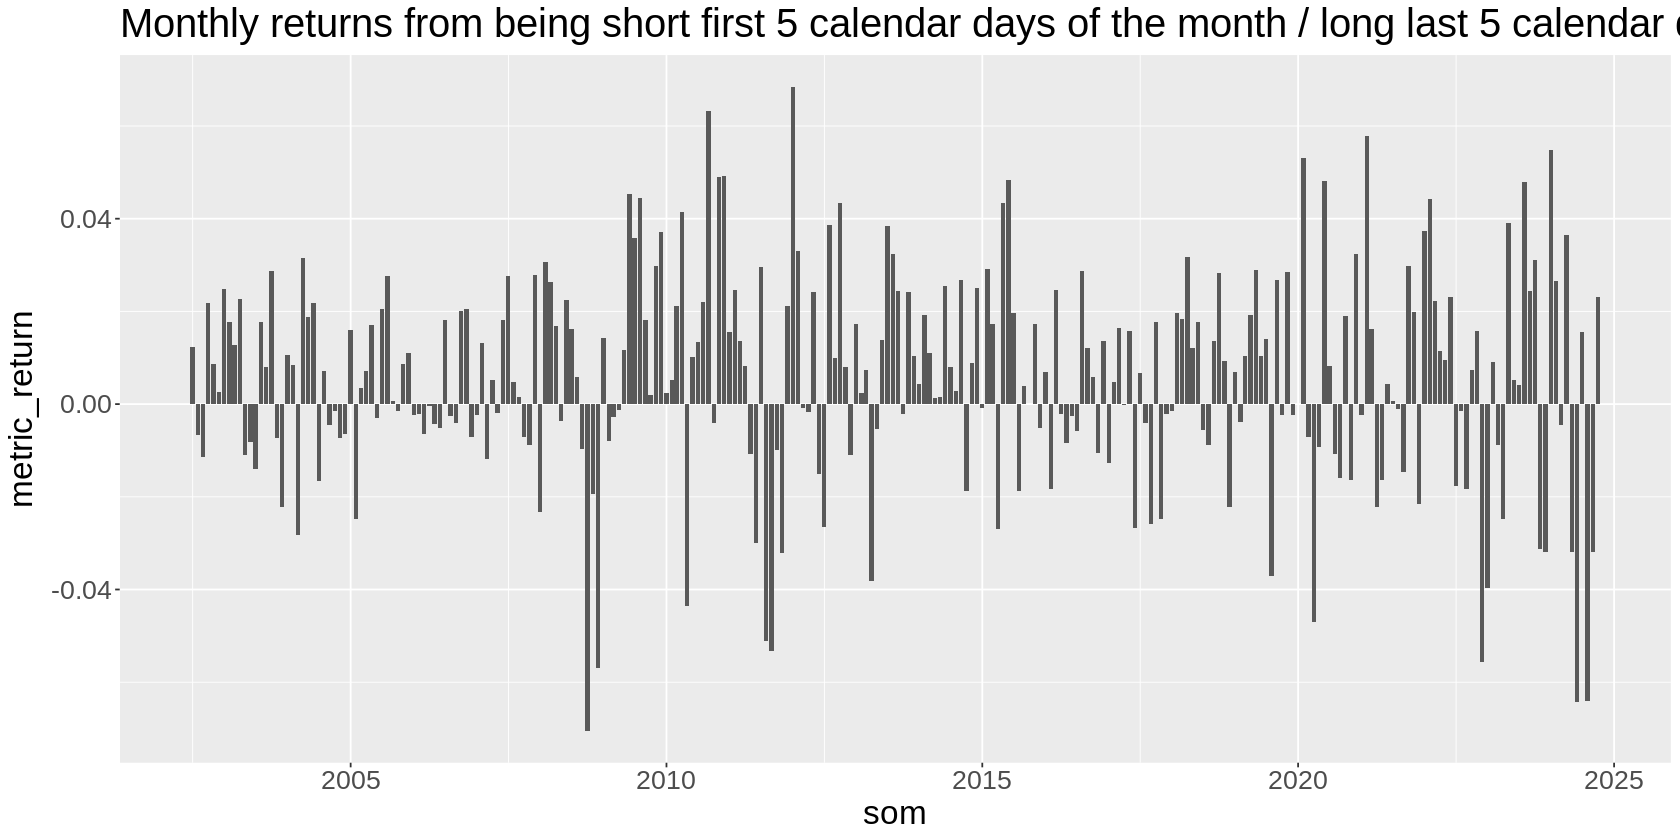

In [ ]:
returns %>%
  na.omit()  %>%
  ungroup() %>%
  mutate(metric_return = case_when(dom <= 5 ~ -1, dom >= 31-5 ~ 1, TRUE ~ 0) * logreturns) %>%
  group_by(som) %>%
  summarize(metric_return = sum(metric_return)) %>%
  ggplot(aes(x=som, y=metric_return)) +
    geom_bar(stat='identity') +
    ggtitle('Monthly returns from being short first 5 calendar days of the month / long last 5 calendar days of the month')

In [ ]:
returns %>%
  na.omit()  %>%
  ungroup() %>%
  mutate(metric_return = case_when(dom <= 5 ~ -1, dom >= 31-5 ~ 1, TRUE ~ 0) * logreturns) %>%
  group_by(som) %>%
  summarize(metric_return = sum(metric_return)) %>%
  na.omit() %>%
  ungroup() %>%
  summarize(
    mean_return = mean(metric_return) * 12,
    vol = sd(metric_return) * sqrt(12),
    sd = mean_return / vol
  )

mean_return,vol,sd
<dbl>,<dbl>,<dbl>
0.06926994,0.07948354,0.8715004


Aggregate by year. How often wouldn't this have made money?

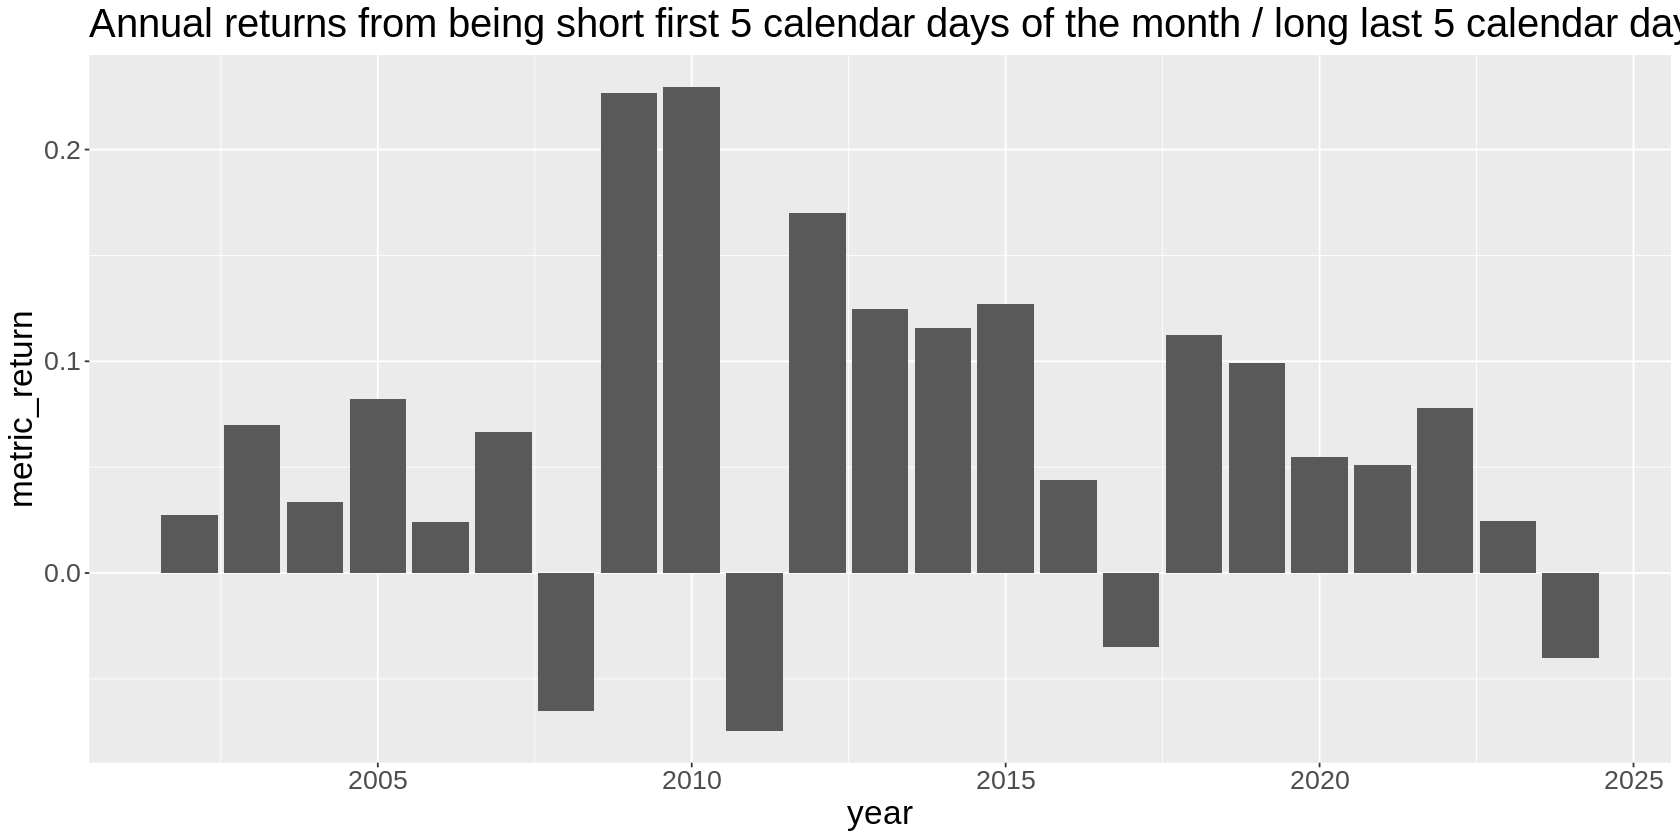

In [ ]:
returns %>%
  na.omit()  %>%
  ungroup() %>%
  mutate(year = lubridate::year(date)) %>%
  mutate(metric_return = case_when(dom <= 5 ~ -1, dom >= 31-5 ~ 1, TRUE ~ 0) * logreturns) %>%
  group_by(year) %>%
  summarize(metric_return = sum(metric_return)) %>%
  ggplot(aes(x=year, y=metric_return)) +
    geom_bar(stat='identity') +
    ggtitle('Annual returns from being short first 5 calendar days of the month / long last 5 calendar days of the month')

# Do we see this effect with different, similar assets?

Repeat the analysis with IEF, IGOV.